In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [6]:
ls

data/     model_track_one.h5     model_track_one_v4.h5  Untitled.ipynb
Drive.py  model_track_one_v3.h5  saved_models/


In [8]:
ls data/ 

driving_log.csv  IMG/


In [5]:
pwd

'/home/paperspace/Self_Driving_Car_Projects/Behavorial_Cloning/track_one'

In [10]:
datadir = '/home/paperspace/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/center_2019_04_17_10_29_27_133.jpg,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/left_2019_04_17_10_29_27_133.jpg,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/right_2019_04_17_10_29_27_133.jpg,0.0,0.0,0.0,0.000038
1,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/center_2019_04_17_10_29_27_203.jpg,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/left_2019_04_17_10_29_27_203.jpg,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/right_2019_04_17_10_29_27_203.jpg,0.0,0.0,0.0,0.000136
2,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/center_2019_04_17_10_29_27_275.jpg,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/left_2019_04_17_10_29_27_275.jpg,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/right_2019_04_17_10_29_27_275.jpg,0.0,0.0,0.0,0.000152
3,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/center_2019_04_17_10_29_27_346.jpg,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/left_2019_04_17_10_29_27_346.jpg,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/right_2019_04_17_10_29_27_346.jpg,0.0,0.0,0.0,0.000165
4,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/center_2019_04_17_10_29_27_421.jpg,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/left_2019_04_17_10_29_27_421.jpg,/Users/user/Github/Self_Driving_Car_Projects/Behavorial_Cloning/track_two/data/IMG/right_2019_04_17_10_29_27_421.jpg,0.0,0.0,0.0,0.000230


In [11]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_04_17_10_29_27_133.jpg,left_2019_04_17_10_29_27_133.jpg,right_2019_04_17_10_29_27_133.jpg,0.0,0.0,0.0,0.000038
1,center_2019_04_17_10_29_27_203.jpg,left_2019_04_17_10_29_27_203.jpg,right_2019_04_17_10_29_27_203.jpg,0.0,0.0,0.0,0.000136
2,center_2019_04_17_10_29_27_275.jpg,left_2019_04_17_10_29_27_275.jpg,right_2019_04_17_10_29_27_275.jpg,0.0,0.0,0.0,0.000152
3,center_2019_04_17_10_29_27_346.jpg,left_2019_04_17_10_29_27_346.jpg,right_2019_04_17_10_29_27_346.jpg,0.0,0.0,0.0,0.000165
4,center_2019_04_17_10_29_27_421.jpg,left_2019_04_17_10_29_27_421.jpg,right_2019_04_17_10_29_27_421.jpg,0.0,0.0,0.0,0.000230


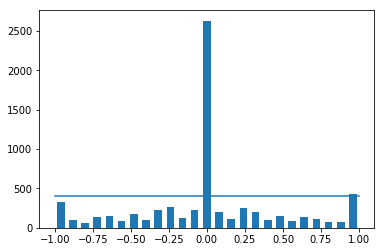

In [12]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data: 6525
removed: 2263
remaining: 4262


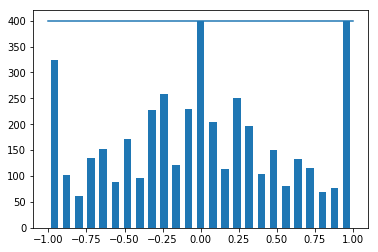

In [13]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))
 
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))


In [16]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings
 
image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2019_04_17_10_29_27_705.jpg
left        left_2019_04_17_10_29_27_705.jpg  
right       right_2019_04_17_10_29_27_705.jpg 
steering    0                                 
throttle    0.710358                          
reverse     0                                 
speed       1.09446                           
Name: 8, dtype: object


In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 10228
Valid Samples: 2558


Text(0.5, 1.0, 'Validation set')

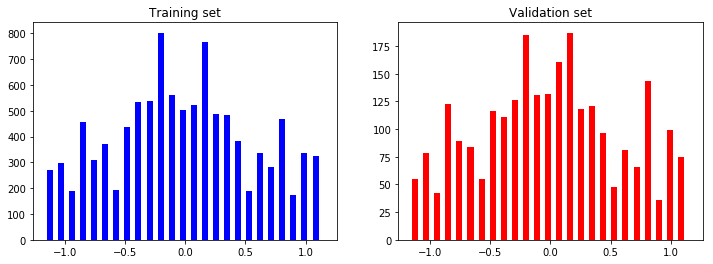

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [18]:
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

Text(0.5, 1.0, 'Zoomed Image')

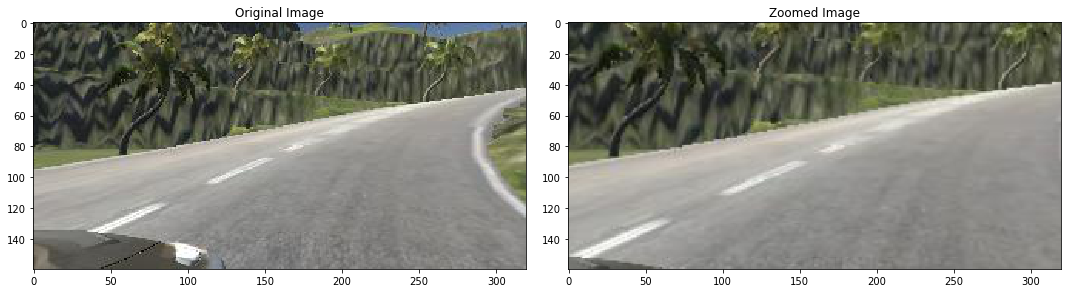

In [19]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [20]:
def pan(image):
    pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

Text(0.5, 1.0, 'Panned Image')

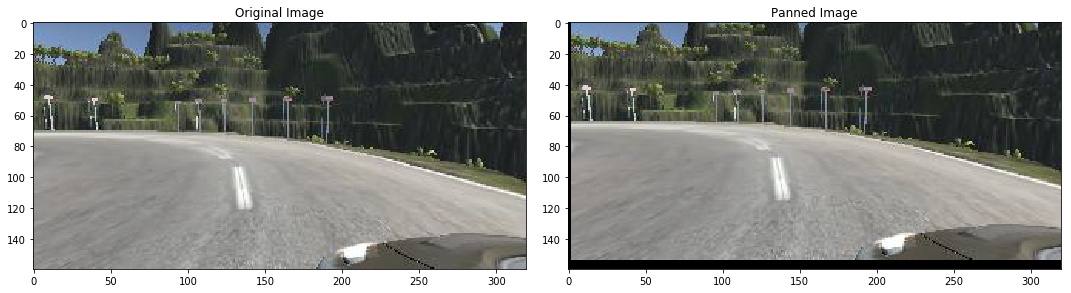

In [21]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [22]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'Brightness altered image ')

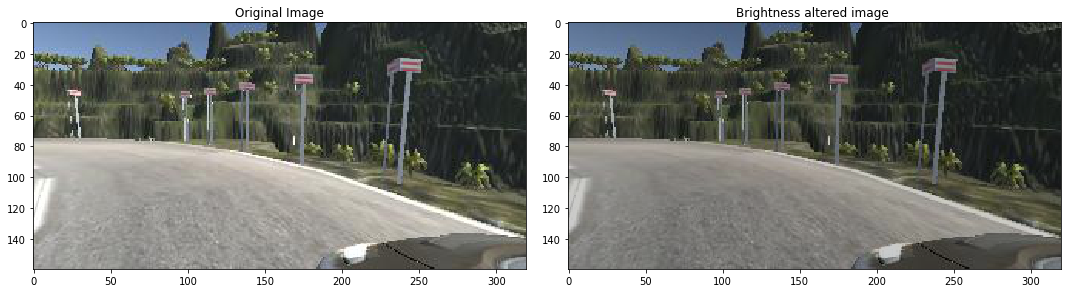

In [23]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
 
axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

In [24]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.30000000000000004')

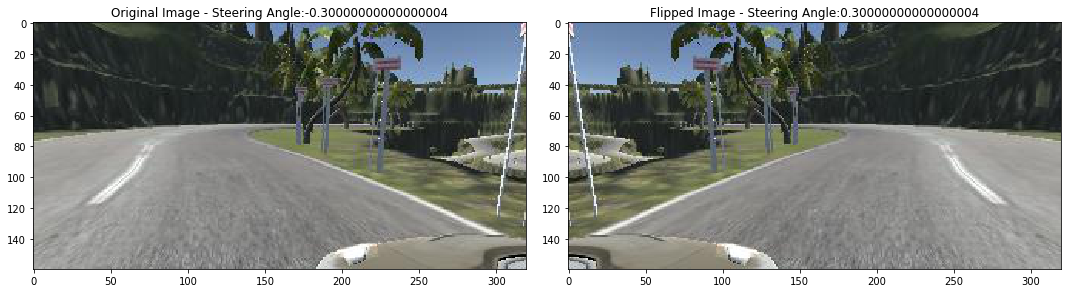

In [25]:
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]
  
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))
 
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [26]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle

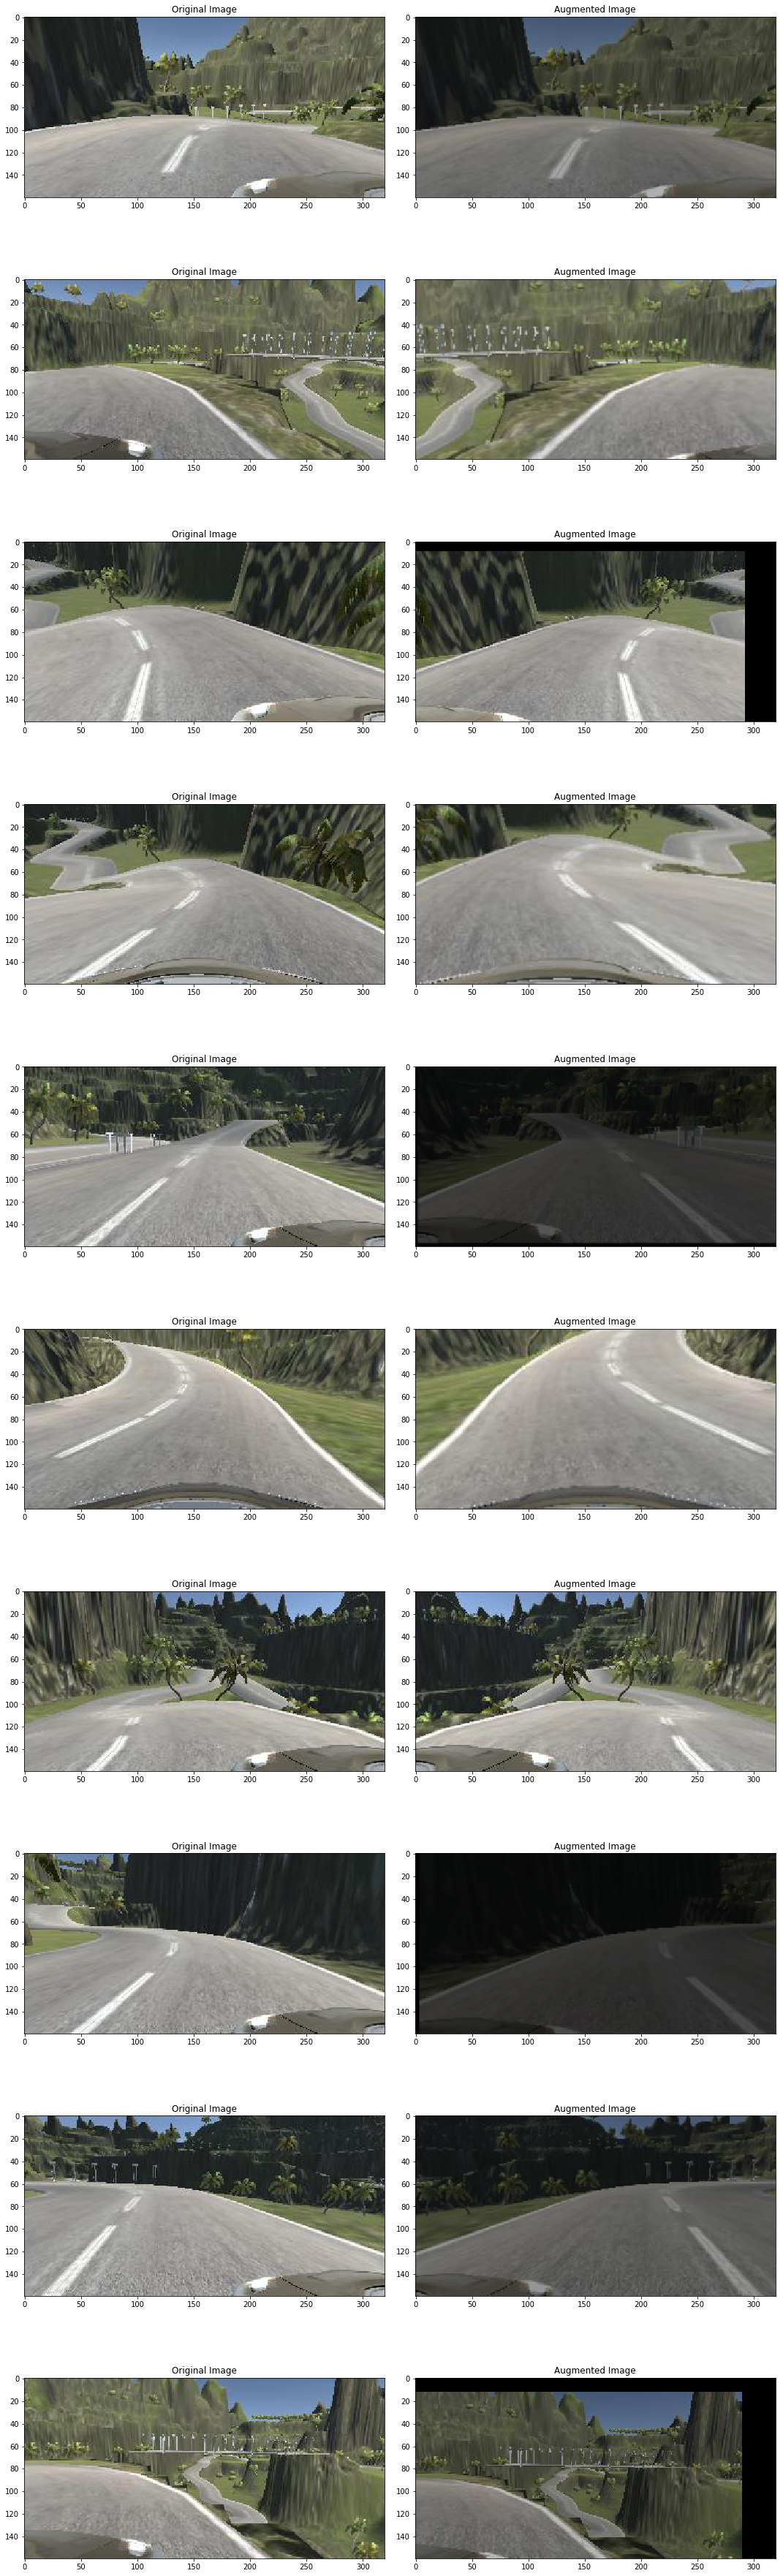

In [27]:
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()
 
for i in range(10):
    randnum = random.randint(0, len(image_paths) - 1)
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]

    original_image = mpimg.imread(random_image)
    augmented_image, steering = random_augment(random_image, random_steering)

    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Original Image")

    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title("Augmented Image")

In [28]:
def img_preprocess(img):
    new_img = img[50:140,:,:]
    # apply subtle blur
    new_img = cv2.GaussianBlur(new_img, (3,3), 0)
    # scale to 66x200x3 (same as nVidia)
    new_img = cv2.resize(new_img,(200, 66), interpolation = cv2.INTER_AREA)
    # scale to ?x?x3
    #new_img = cv2.resize(new_img,(80, 10), interpolation = cv2.INTER_AREA)
    # convert to YUV color space (as nVidia paper suggests)
    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2YUV)
    return new_img

Text(0.5, 1.0, 'Preprocessed Image')

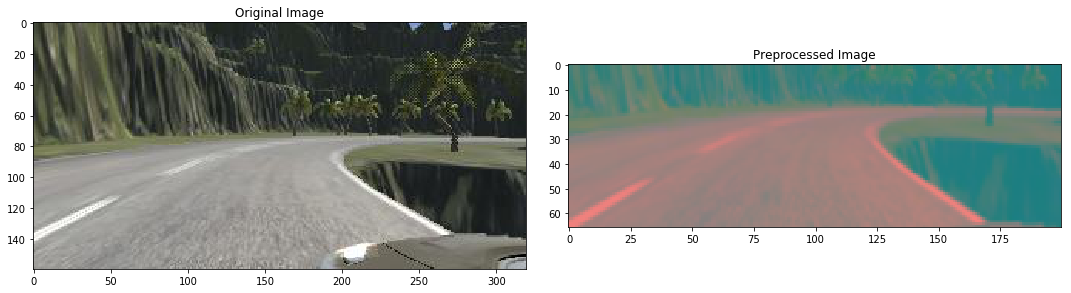

In [29]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [30]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
        random_index = random.randint(0, len(image_paths) - 1)
      
        if istraining:
            im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
        else:
            im = mpimg.imread(image_paths[random_index])
            steering = steering_ang[random_index]
      
        im = img_preprocess(im)
        batch_img.append(im)
        batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

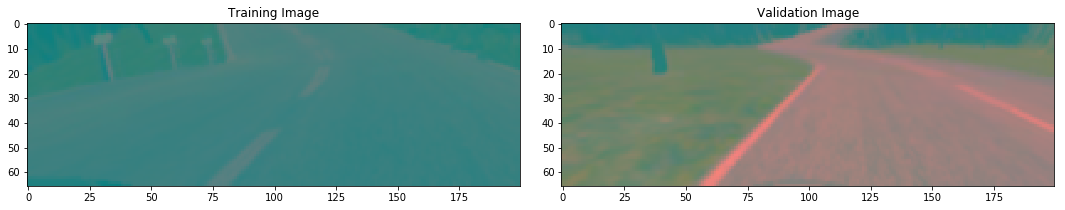

In [31]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [35]:
def nvidia_model():
    model = Sequential()
    model.add(Conv2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
    model.add(Conv2D(36, 5, 5, subsample=(2, 2), activation='elu'))
    model.add(Conv2D(48, 5, 5, subsample=(2, 2), activation='elu'))
    model.add(Conv2D(64, 3, 3, activation='elu'))

    model.add(Conv2D(64, 3, 3, activation='elu'))
    #   model.add(Dropout(0.5))


    model.add(Flatten())

    model.add(Dense(100, activation = 'elu'))
    #   model.add(Dropout(0.5))

    model.add(Dense(50, activation = 'elu'))
    #   model.add(Dropout(0.5))

    model.add(Dense(10, activation = 'elu'))
    #   model.add(Dropout(0.5))

    model.add(Dense(1))

    optimizer = Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model


In [36]:
model = nvidia_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dens

/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/home/paperspace/anaconda3/envs/fa

In [37]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

In [38]:
model = nvidia_model()
print(model.summary())
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=15,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               115300    
__________

/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/home/paperspace/anaconda3/envs/fa

Epoch 1/15
300/300 [==============================] - 122s 408ms/step - loss: 0.3032 - val_loss: 0.1505
Epoch 2/15
300/300 [==============================] - 123s 410ms/step - loss: 0.1863 - val_loss: 0.1574
Epoch 3/15
300/300 [==============================] - 122s 406ms/step - loss: 0.1666 - val_loss: 0.1368
Epoch 4/15
300/300 [==============================] - 122s 406ms/step - loss: 0.1561 - val_loss: 0.1210
Epoch 5/15
300/300 [==============================] - 122s 408ms/step - loss: 0.1409 - val_loss: 0.1143
Epoch 6/15
300/300 [==============================] - 123s 410ms/step - loss: 0.1410 - val_loss: 0.1149
Epoch 7/15
300/300 [==============================] - 121s 402ms/step - loss: 0.1357 - val_loss: 0.1167
Epoch 8/15
300/300 [==============================] - 121s 403ms/step - loss: 0.1282 - val_loss: 0.1133
Epoch 9/15
300/300 [==============================] - 119s 397ms/step - loss: 0.1283 - val_loss: 0.1063
Epoch 10/15
300/300 [==============================] - 121s 403m

Text(0.5, 0, 'Epoch')

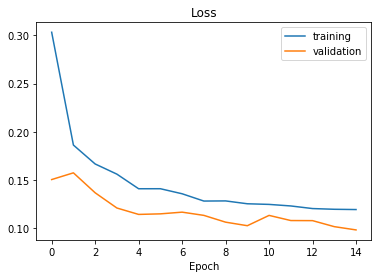

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [41]:
model.save('model_track_two_v1.h5')